## [MNIST](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist)

In [1]:
import os
import random
import numpy as np
import torch
import torchvision

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [3]:
dataset = torchvision.datasets.MNIST('./data', download=True)

In [4]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.mnist.MNIST'>


In [5]:
print(len(dataset))

60000


In [6]:
n = 200
data, target = dataset[n]

In [7]:
print(type(data))

<class 'PIL.Image.Image'>


In [8]:
print(data.mode, data.width, data.height)

L 28 28


In [9]:
print(type(target))

<class 'int'>


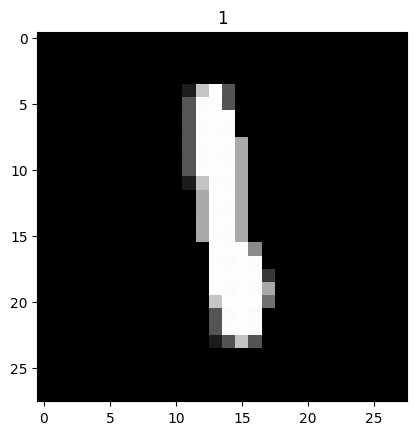

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data, cmap='gray')
data.show()

In [11]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.MNIST('./data', transform = ToTensor)

In [12]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 1, 28, 28])
torch.Size([28, 28])


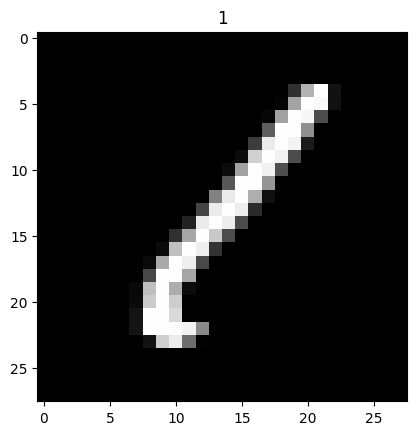

In [13]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(color)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic, cmap='gray')
    plt.show()
    break

In [14]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


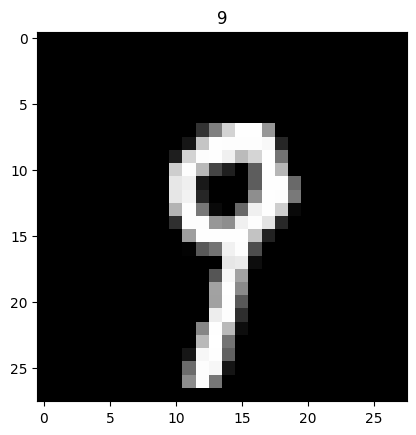

In [15]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    img = img[0] 
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(img, cmap='gray')
    plt.show()
    break

In [16]:
# 1000개 batch
n = 1000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 2000개 batch
n = 2000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 999개 batch
n = 999
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))

print(l)
print('Total number of data: {}'.format(i))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Total number of data: 60000
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Total number of data: 60000
[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 60]
Total number of data: 60000


In [17]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [18]:
import torchvision.transforms as transforms
#compose = transforms.Compose([
#    transforms.ToTensor()
#])

compose = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))
])

train_data = torchvision.datasets.MNIST(root='./data/', train=True, transform=compose, download=True)
test_data  = torchvision.datasets.MNIST(root='./data/', train=False, transform=compose, download=True)

In [19]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 60000
test sets: 10000


In [20]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [21]:
class MNISTModel(nn.Module):
    def __init__(self, output_size):
        super(MNISTModel, self).__init__()

        self.c1 = nn.Conv2d(1, 8, kernel_size=3)
        self.c2 = nn.Conv2d(8, 16, kernel_size=3) # (n, 16, 11, 11)
        self.c3 = nn.Conv2d(16, 32, kernel_size=3) # (n, 32, 9, 9)
        self.c4 = nn.Conv2d(32, 32, kernel_size=1) # (n, 32, 9, 9)

        nn.init.kaiming_normal_(self.c1.weight)
        nn.init.kaiming_normal_(self.c2.weight)
        nn.init.kaiming_normal_(self.c3.weight)
        nn.init.kaiming_normal_(self.c4.weight)
        
        self.cv = nn.Sequential(
                self.c1,
                nn.BatchNorm2d(8),
                nn.ReLU(),
                nn.MaxPool2d(2),
                self.c2,
                nn.BatchNorm2d(16),
                nn.ReLU(),
                self.c3,
                nn.BatchNorm2d(32),
                nn.ReLU(),
                self.c4,
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.Dropout(0.2)
        )

        self.l1 = nn.Linear(32*9*9, output_size)
        nn.init.kaiming_normal_(self.l1.weight)

        self.fc = nn.Sequential(self.l1, 
                        nn.BatchNorm1d(output_size))        

    def forward(self, x):
        x = self.cv(x)
        x = x.view(-1, 32*9*9)
        output = self.fc(x)
        result = F.softmax(output, dim=0)
        with torch.no_grad():
            value = torch.max(result, 1)[1]
        return result, value

In [22]:
model = MNISTModel(10).to(device)

In [23]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y, _ = model(data)
    print(y)
    print(y.sum(dim=1))
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 1, 28, 28])
tensor([[0.0952, 0.0260, 0.0218, 0.0465, 0.2471, 0.0637, 0.0566, 0.0259, 0.0549,
         0.3630],
        [0.1702, 0.2580, 0.0203, 0.0128, 0.0524, 0.2059, 0.0209, 0.0119, 0.0127,
         0.1211],
        [0.0280, 0.0337, 0.1759, 0.0536, 0.0233, 0.1554, 0.1048, 0.0732, 0.0514,
         0.1643],
        [0.0202, 0.3126, 0.1742, 0.0986, 0.0231, 0.0129, 0.0108, 0.0296, 0.0297,
         0.1063],
        [0.1910, 0.0278, 0.0336, 0.2609, 0.0423, 0.0450, 0.2015, 0.0470, 0.1038,
         0.0810],
        [0.0343, 0.0224, 0.3777, 0.0129, 0.0904, 0.1561, 0.0345, 0.1525, 0.2890,
         0.0599],
        [0.3358, 0.0868, 0.0879, 0.0445, 0.1628, 0.0237, 0.0421, 0.0336, 0.0315,
         0.0318],
        [0.0310, 0.0349, 0.0490, 0.2086, 0.0157, 0.0566, 0.3864, 0.3430, 0.3255,
         0.0383],
        [0.0787, 0.0224, 0.0179, 0.1433, 0.3106, 0.0197, 0.0475, 0.0526, 0.0227,
         0.0092],
        [0.0156, 0.1755, 0.0418, 0.1183, 0.0322, 0.2610, 0.0949, 0.2308, 0.0788,


In [24]:
BATCH_SIZE = 1000

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [25]:
model = MNISTModel(10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 10 # 10회 학습

for epoch in range(n_epochs):
    total_loss = 0
    for data, target in train_loader:
        data = data.to(device)
        target = target.to(device)
        y, _ = model(data)
        del data
        loss = criterion(y, target)
        del target
        total_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print('epoch {}th loss: {}'.format(epoch, total_loss / 60))

epoch 0th loss: 2.294426155090332
epoch 1th loss: 2.293667944272359
epoch 2th loss: 2.2936460773150125
epoch 3th loss: 2.293633846441905
epoch 4th loss: 2.293626280625661
epoch 5th loss: 2.293621810277303
epoch 6th loss: 2.2936174074808755
epoch 7th loss: 2.293614721298218
epoch 8th loss: 2.2936120708783467
epoch 9th loss: 2.293609595298767


In [26]:
model = MNISTModel(10).to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 50 # 50회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y, _ = model(train_data)
        del train_data
        loss = criterion(y, train_target).sum()
        del train_target
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1

    if epoch % 10 == 0:
        model.eval()
        n_test = 0
        test_loss = 0
        for test_data, test_target in test_loader:
            test_data = test_data.to(device)
            test_target = test_target.to(device)
            y_pred, _ = model(test_data)
            del test_data
            loss = criterion(y_pred, test_target).sum()
            test_loss += loss.data.cpu().numpy()
            n_test += 1

        print('epoch {}th training loss: {} test loss: {}'.format(epoch, train_loss / n_train, test_loss / n_test))
        list_training_loss.append(train_loss / n_train)
        list_test_loss.append(test_loss / n_test)

epoch 0th training loss: 2.294415481885274 test loss: 2.2936588764190673
epoch 10th training loss: 2.2936078310012817 test loss: 2.2936049938201903
epoch 20th training loss: 2.2935994068781533 test loss: 2.2935981512069703
epoch 30th training loss: 2.293596283594767 test loss: 2.2935956001281737
epoch 40th training loss: 2.2935945868492125 test loss: 2.2935940265655517


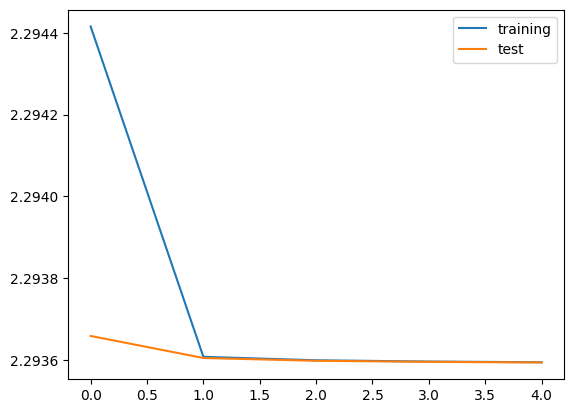

In [27]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import accuracy_score
import numpy as np

model.eval()
y_test = None
y_pred = None
for test_data, test_target in test_loader:
    test_data = test_data.to(device)
    test_target = test_target.to(device)
    _, y = model(test_data)
    del test_data
    if None == y_test:
        y_test = test_target
    else:
        torch.cat([y_test, test_target], dim=0)
    if None == y_pred:
        y_pred = y
    else:
        torch.cat([y_pred, y], dim=0)

score = accuracy_score(y_test.cpu(), y_pred.cpu())
print(score)

0.976
